Prática de Segmentação de imagens

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

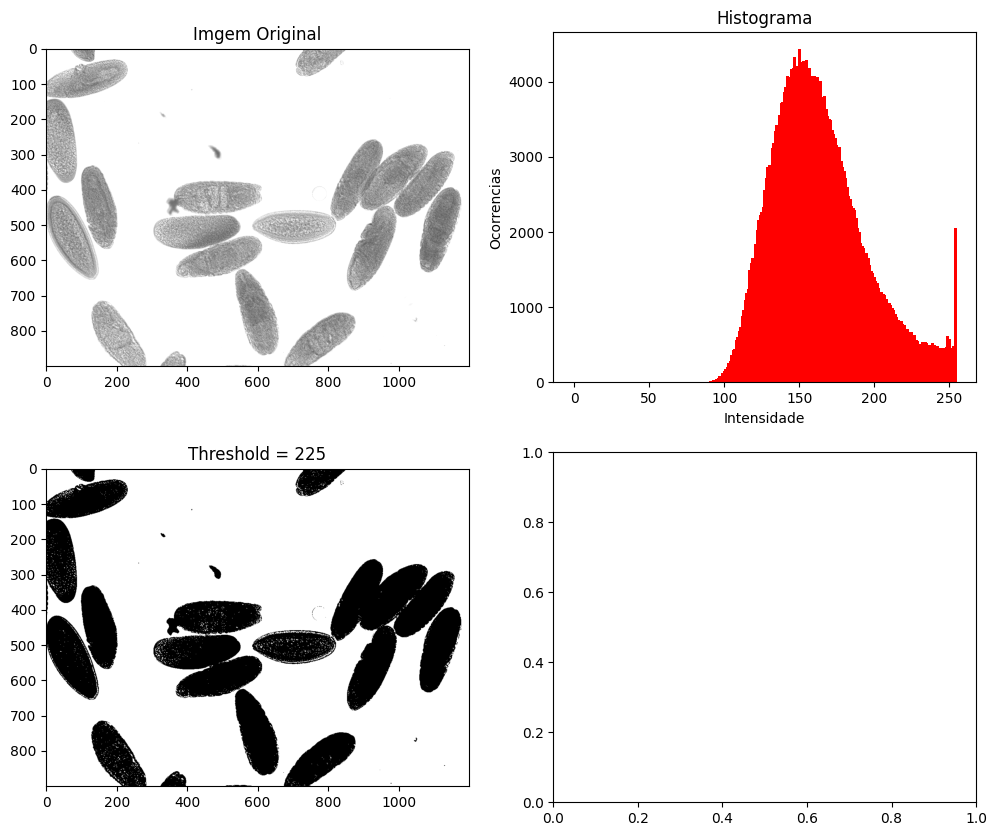

In [40]:
img1 = cv2.imread("img/insitu107595.jpg", cv2.IMREAD_GRAYSCALE)
imgHist = np.histogram(img1, bins=256, range=(0,255))[0]
imgHistParc = imgHist[:255]
_, imgHistBinary = cv2.threshold(img1, 225, 255, cv2.THRESH_BINARY)

f, axarr = plt.subplots(2,2, figsize = (12,10))
axarr[0,0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].bar(np.arange(255), imgHistParc, width=2, bottom=None, align='center', label='Histogram', color='red')
axarr[0,1].title.set_text("Histograma")
axarr[0,1].set_xlabel("Intensidade")
axarr[0,1].set_ylabel("Ocorrencias")
axarr[1,0].imshow(imgHistBinary, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Threshold = 225")

2. Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

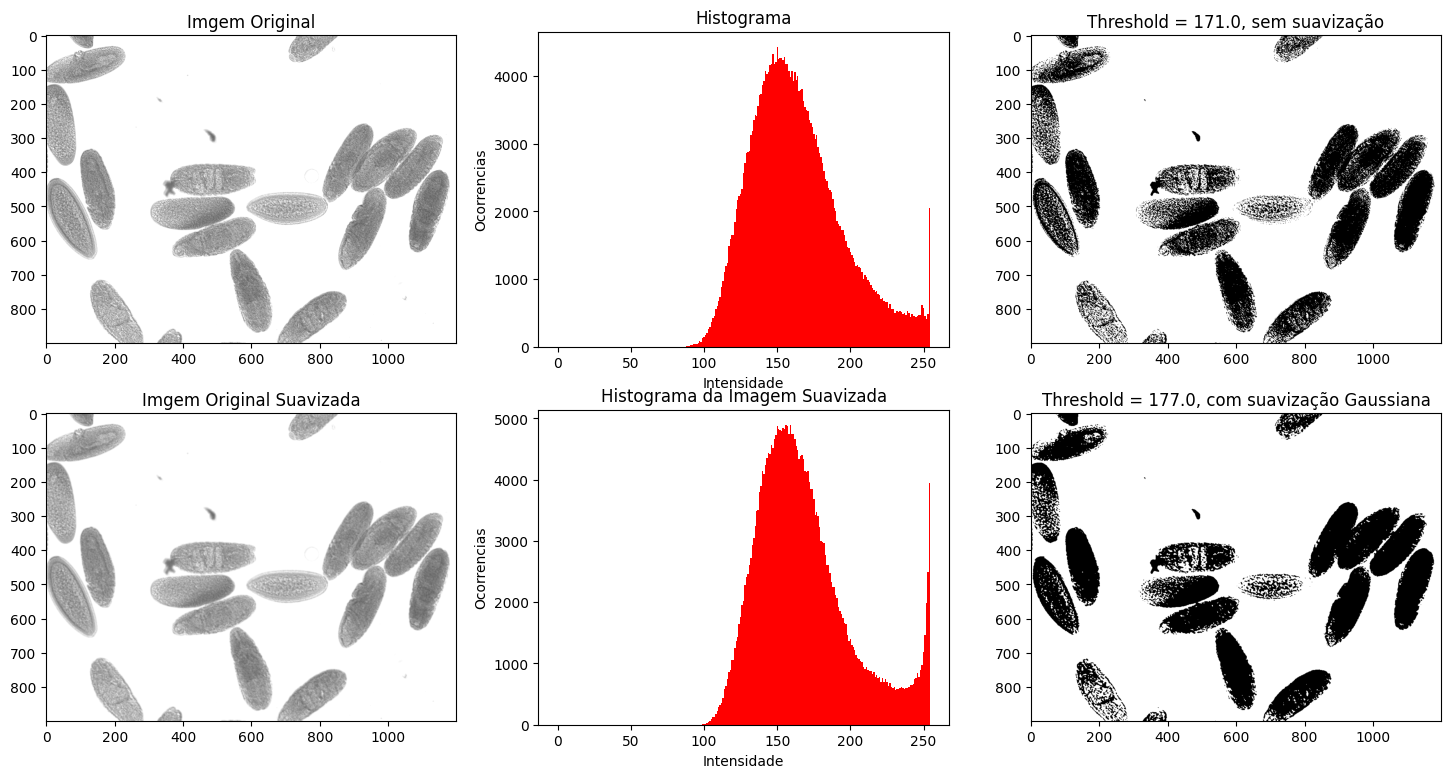

In [44]:
def deltaT (img):
    t = (int(img.max())+int(img.min()))/2
    while True:
        g1 = (t+int(img.min()))/2
        g2 = (int(img.max())+t+1)/2
        t1 = (g1+g2)/2
        if t-t1<=1 and t-t1>=0:
            break
        t=t1
    return t1

def suavMedia(img):
    mediaMask = 3
    imgY, imgX = img.shape
    imgMedia = np.zeros_like(img)

    for i in range(imgY):
        for j in range(imgX):
            mask = img[i:i+mediaMask, j:j+mediaMask]
            imgMedia[i,j] = np.sum(mask)/(mediaMask**2)
    
    return imgMedia

kernel_size = (5, 5)

t = deltaT(img1)
imgMedia = cv2.GaussianBlur(img1, kernel_size, 0)
tSuav = deltaT(imgMedia)
imgHistSuav = np.bincount(imgMedia.flatten(), minlength=256)
imgHistSuavParc = imgHistSuav[:255]
_, imgHistBinary = cv2.threshold(img1, t, 255, cv2.THRESH_BINARY)
_, imgHistBinarySuav = cv2.threshold(imgMedia, tSuav, 255, cv2.THRESH_BINARY)

f, axarr = plt.subplots(2,3, figsize = (18,9))
axarr[0,0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].bar(np.arange(255), imgHistParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[0,1].title.set_text("Histograma")
axarr[0,1].set_xlabel("Intensidade")
axarr[0,1].set_ylabel("Ocorrencias")
axarr[0,2].imshow(imgHistBinary, cmap='gray', vmin=0, vmax=255)
axarr[0,2].title.set_text("Threshold = "+str(t)+", sem suavização")
axarr[1,0].imshow(imgMedia, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Imgem Original Suavizada")
axarr[1,1].bar(np.arange(255), imgHistSuavParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[1,1].title.set_text("Histograma da Imagem Suavizada")
axarr[1,1].set_xlabel("Intensidade")
axarr[1,1].set_ylabel("Ocorrencias")
axarr[1,2].imshow(imgHistBinarySuav, cmap='gray', vmin=0, vmax=255)
axarr[1,2].title.set_text("Threshold = "+str(tSuav)+", com suavização Gaussiana")

3. Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes

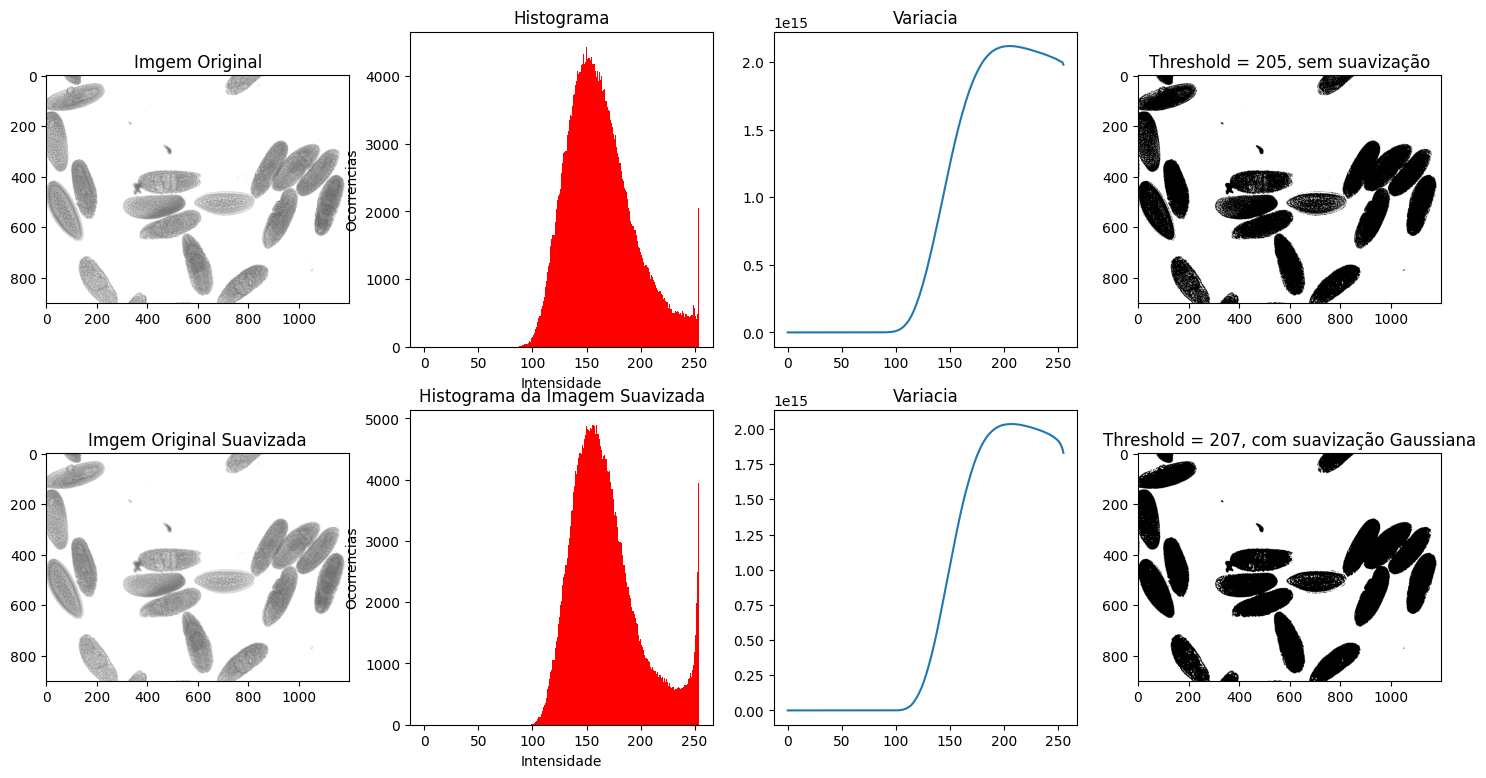

In [73]:
def otsu(img):
        imgHist = np.histogram(img, bins=256, range=(0,255))[0]
        imgPint = imgHist*np.arange(256)
        imgHistParc = imgHist[:255]
        imgHistNorm = imgHist/np.sum(imgHist)
        variancia = np.zeros(256)
        for i in range(256):
                probFundo = np.sum(imgHistNorm[:i])
                probObj = 1-probFundo
                m1 = np.sum(imgPint[:i])/probFundo if probFundo>0 else 0
                m2 = np.sum(imgPint[i:])/probObj if probObj>0 else 0
                variancia[i] = probFundo*probObj*((m1-m2)**2)
        return imgHistParc, variancia

img1HistParc, img1Variancia = otsu(img1)
img1SuavHistParc, img1SuavVariancia = otsu(imgMedia)

_, img2Binary = cv2.threshold(img1, np.argmax(img1Variancia), 255, cv2.THRESH_BINARY)
_, img2SuavBinary = cv2.threshold(imgMedia, np.argmax(img1SuavVariancia), 255, cv2.THRESH_BINARY)

f, axarr = plt.subplots(2,4, figsize = (18,9))
axarr[0,0].imshow(img1, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].bar(np.arange(255), img1HistParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[0,1].title.set_text("Histograma")
axarr[0,1].set_xlabel("Intensidade")
axarr[0,1].set_ylabel("Ocorrencias")
axarr[0,2].plot(np.arange(256), img1Variancia, linestyle='-')
axarr[0,2].title.set_text("Variancia")
axarr[0,3].imshow(img2Binary, cmap='gray', vmin=0, vmax=255)
axarr[0,3].title.set_text("Threshold = "+str(np.argmax(img1Variancia))+", sem suavização")
axarr[1,0].imshow(imgMedia, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Imgem Original Suavizada")
axarr[1,1].bar(np.arange(255), img1SuavHistParc, width=1, bottom=None, align='center', label='Histogram', color='red')
axarr[1,1].title.set_text("Histograma da Imagem Suavizada")
axarr[1,1].set_xlabel("Intensidade")
axarr[1,1].set_ylabel("Ocorrencias")
axarr[1,2].plot(np.arange(256), img1SuavVariancia, linestyle='-')
axarr[1,2].title.set_text("Variancia")
axarr[1,3].imshow(img2SuavBinary, cmap='gray', vmin=0, vmax=255)
axarr[1,3].title.set_text("Threshold = "+str(np.argmax(img1SuavVariancia))+", com suavização Gaussiana")

4. Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)